## 문제 설명
- 휴대폰의 자판은 컴퓨터 키보드 자판과는 다르게 하나의 키에 여러 개의 문자가 할당될 수 있습니다. 키 하나에 여러 문자가 할당된 경우, 동일한 키를 연속해서 빠르게 누르면 할당된 순서대로 문자가 바뀝니다.

- 예를 들어, 1번 키에 "A", "B", "C" 순서대로 문자가 할당되어 있다면 1번 키를 한 번 누르면 "A", 두 번 누르면 "B", 세 번 누르면 "C"가 되는 식입니다.

- 같은 규칙을 적용해 아무렇게나 만든 휴대폰 자판이 있습니다. 이 휴대폰 자판은 키의 개수가 1개부터 최대 100개까지 있을 수 있으며, 특정 키를 눌렀을 때 입력되는 문자들도 무작위로 배열되어 있습니다. 또, 같은 문자가 자판 전체에 여러 번 할당된 경우도 있고, 키 하나에 같은 문자가 여러 번 할당된 경우도 있습니다. 심지어 아예 할당되지 않은 경우도 있습니다. 따라서 몇몇 문자열은 작성할 수 없을 수도 있습니다.

- 이 휴대폰 자판을 이용해 특정 문자열을 작성할 때, 키를 최소 몇 번 눌러야 그 문자열을 작성할 수 있는지 알아보고자 합니다.

- 1번 키부터 차례대로 할당된 문자들이 순서대로 담긴 문자열배열 keymap과 입력하려는 문자열들이 담긴 문자열 배열 targets가 주어질 때, 각 문자열을 작성하기 위해 키를 최소 몇 번씩 눌러야 하는지 순서대로 배열에 담아 return 하는 solution 함수를 완성해 주세요.

- 단, 목표 문자열을 작성할 수 없을 때는 -1을 저장합니다.

##제한사항
- 1 ≤ keymap의 길이 ≤ 100
    - 1 ≤ keymap의 원소의 길이 ≤ 100
    - keymap[i]는 i + 1번 키를 눌렀을 때 순서대로 바뀌는 문자를 의미합니다.
        - 예를 들어 keymap[0] = "ABACD" 인 경우 1번 키를 한 번 누르면 A, 두 번 누르면 B, 세 번 누르면 A 가 됩니다.
    - keymap의 원소의 길이는 서로 다를 수 있습니다.
    - keymap의 원소는 알파벳 대문자로만 이루어져 있습니다.
- 1 ≤ targets의 길이 ≤ 100
    - 1 ≤ targets의 원소의 길이 ≤ 100
    - targets의 원소는 알파벳 대문자로만 이루어져 있습니다.
    

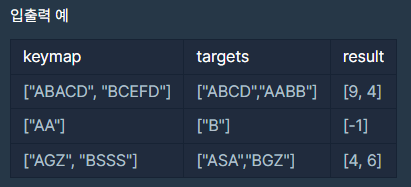

#### 예시 모음
- 아래의 예시에서 하나를 정해 실행합니다.

In [174]:
keymap = ["ABACD", "BCEFD"]
targets = ["ABCD","AABB"]
# keymap = ["AA"]
# targets = ["B"]
# keymap = ["AGB", "BSSS"]
# targets = ["AGZ", "BSSS"]

In [173]:
def solution(keymap, targets):
    answer = []
    
    # key값은 알파벳을 value값은 0을 갖는 dict를 하나 만듭니다.
    alp_dict = {'A': 0,'B': 0,'C': 0,'D': 0,'E': 0,'F': 0,'G': 0,'H': 0,'I': 0,
 'J': 0,'K': 0,'L': 0,'M': 0,'N': 0,'O': 0,'P': 0,'Q': 0,'R': 0,'S': 0,'T': 0,'U': 0,'V': 0,'W': 0,'X': 0,'Y': 0,'Z': 0}
    
    # keymap의 요소를 살펴보며 가장 적은 탭으로
    # alp_dict의 key값에 해당하는 알파벳을 입력할 수 있는 탭 수를 alp_dict에 value 값으로 넣습니다.
    for k in alp_dict.keys():
        for test in keymap:
            if alp_dict[k] == 0:
                alp_dict[k] = test.find(k)+1 if test.find(k) != -1 else 0
            elif (test.find(k) != -1) and (alp_dict[k] >= test.find(k)+1):
                alp_dict[k] = test.find(k)+1 if test.find(k) != -1 else 0
                
    # targets의 요소 하나하나를 text로 할당해 살펴봅시다.
    for text in targets:
        
        # 리스트 내 for문으로 text의 요소 하나하나에 해당하는 alp_dict의 value 값을
        # result에 할당합니다.
        result = [alp_dict[k] for k in text]
        
        # 이때 result안의 요소 값이 하나라도 0이 들어가면
        if 0 in result:
            # 해당 글자를 만들 수 없으므로 answer에 -1 넣습니다.
            answer.append(-1)
        else:
            # 0이 없다면 result의 모든 요소를 합한 값을 answer에 넣습니다.
            answer.append(sum(result))


    return answer

In [175]:
solution(keymap, targets)

[9, 4]

## 다른 사람의 풀이

In [179]:
keymap = ["ABACD", "BCEFD"]
targets = ["ABCD","AABB"]

In [183]:
def solution(keymap, targets):
    answer = []
    
    
    # range(26) 즉 알파벳 갯수 만큼의 101을 리스로 만들어 alpha에 할당
    alpha = [101 for i in range(26)]
    
    # keymap의 요소 하나하나를 i에 할당하여 반복문을 돌린다.
    for i in keymap:
        # keymap의 요소 i를 enumerate로
        # 인덱스와 각 인덱스의 해당하는 값을 살펴본다.
        for idx, j in enumerate(i):
            # 'ABACD'를 i값으로 사용해 예시를들어보자.
            # enumerate('ABACD')에서
            # idx = 0, j = 'A'로 살펴보면
            # ord(j)-ord('A') = 0이 된다
            k = ord(j)-ord('A')
            # k는 0이므로 alpha[0]은 원래있던 alpha[0]과 idx+1의 값 중 최소값이
            # 들어가게 된다.
            alpha[k] = min(alpha[k],idx+1)
    
    # targets의 요소 하나하나를 i에 할당한다.
    # ex) i = 'ABCD'
    for i in targets:
        total = 0
        # i의 요소 하나하나를 j에 할당한다.
        # ex) j = 'A'
        for j in i:
            # ord(j) - ord('A') = 0 이므로 alpha[0] 값이 cnt로 할당.
            cnt = alpha[ord(j) - ord('A')]
            
            # cnt가 101이면
            if cnt ==101:
                # answer에 -1을 넣고 멈춘다.
                answer.append(-1)
                break
            # cnt가 101이 아니면
            else:
                # cnt의 값을 total에 더한다.
                total+= cnt
        else:
            # 그 후 total값을 answer에 할당한다.
            answer.append(total)



    return answer

In [184]:
solution(keymap, targets)

[9, 4]